In [1]:
import pickle

results_dir = 'results/'

alibaba_data_gpu = pickle.load(open(f"{results_dir}/result_alibaba_streaming_GPU.pkl", "rb"))
alibaba_data_cpu = pickle.load(open(f"{results_dir}/result_alibaba_streaming_CPU.pkl", "rb"))

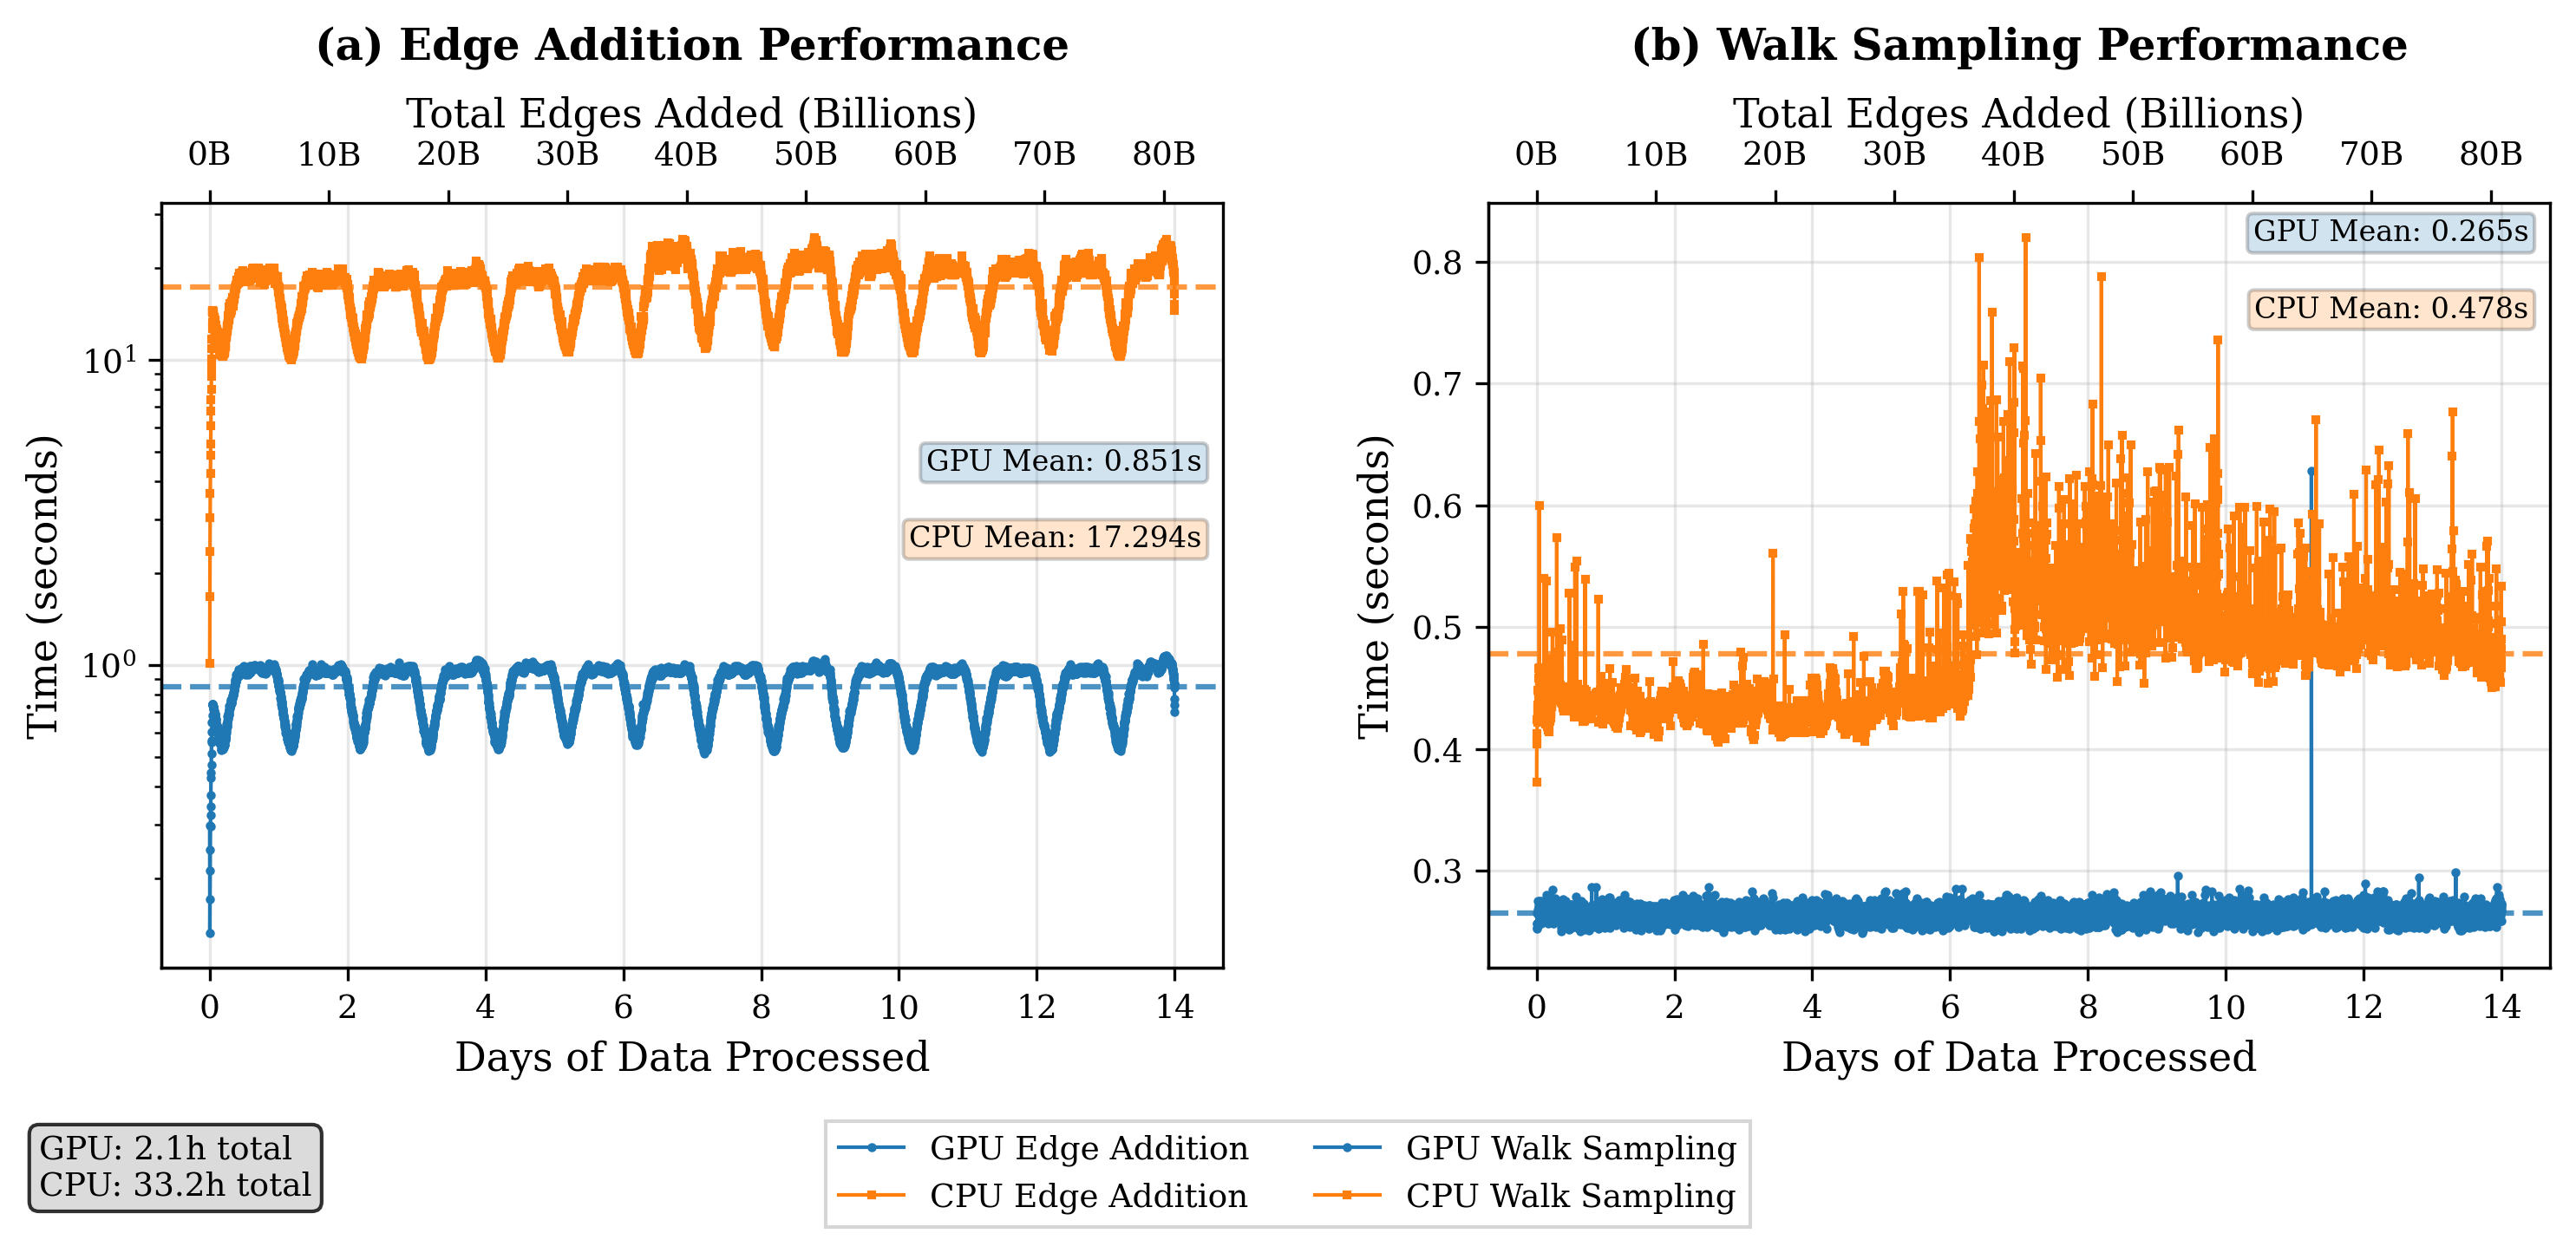

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Configure fonts and style for academic paper
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 10,
    'axes.labelsize': 11,
    'axes.titlesize': 12,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9,
    'text.usetex': False,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight'
})

# Primary data
edge_addition_time_cpu = alibaba_data_cpu['edge_addition_time']
walk_sampling_time_cpu = alibaba_data_cpu['walk_sampling_time']
total_edges_cpu = alibaba_data_cpu['total_edges']

edge_addition_time_gpu = alibaba_data_gpu['edge_addition_time']
walk_sampling_time_gpu = alibaba_data_gpu['walk_sampling_time']
total_edges_gpu = alibaba_data_gpu['total_edges']

# Compute total runtime in hours
total_time_cpu = np.sum(edge_addition_time_cpu) + np.sum(walk_sampling_time_cpu)
total_time_hours_cpu = total_time_cpu / 3600

total_time_gpu = np.sum(edge_addition_time_gpu) + np.sum(walk_sampling_time_gpu)
total_time_hours_gpu = total_time_gpu / 3600

# Calculate mean times
mean_edge_time_cpu = np.mean(edge_addition_time_cpu)
mean_edge_time_gpu = np.mean(edge_addition_time_gpu)
mean_walk_time_cpu = np.mean(walk_sampling_time_cpu)
mean_walk_time_gpu = np.mean(walk_sampling_time_gpu)

# X-axis labels
minutes_per_step = 3
steps_cpu = list(range(1, len(edge_addition_time_cpu) + 1))
step_labels_minutes_cpu = [s * minutes_per_step for s in steps_cpu]
step_labels_days_cpu = [m / 1440 for m in step_labels_minutes_cpu]

steps_gpu = list(range(1, len(edge_addition_time_gpu) + 1))
step_labels_minutes_gpu = [s * minutes_per_step for s in steps_gpu]
step_labels_days_gpu = [m / 1440 for m in step_labels_minutes_gpu]

# Academic color scheme
colors = ['#1f77b4', '#ff7f0e', '#d62728', '#2ca02c']  # Blue, Orange, Red, Green

# Create 1x2 subplot
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(10, 4))

# --- Left plot: Edge Addition Times ---
line1 = ax1.plot(step_labels_days_gpu, edge_addition_time_gpu,
                 label='GPU Edge Addition', marker='o', markersize=1.5,
                 linestyle='-', color=colors[0], linewidth=1)[0]
line2 = ax1.plot(step_labels_days_cpu, edge_addition_time_cpu,
                 label='CPU Edge Addition', marker='s', markersize=1.5,
                 linestyle='-', color=colors[1], linewidth=1)[0]

line3 = ax1.axhline(y=mean_edge_time_gpu, color=colors[0], linestyle='--',
                    alpha=0.8, linewidth=1.5,
                    label=f'GPU Mean: {mean_edge_time_gpu:.3f}s')
line4 = ax1.axhline(y=mean_edge_time_cpu, color=colors[1], linestyle='--',
                    alpha=0.8, linewidth=1.5,
                    label=f'CPU Mean: {mean_edge_time_cpu:.3f}s')

# Add text annotations for edge addition means
ax1.text(0.98, 0.65, f'GPU Mean: {mean_edge_time_gpu:.3f}s',
         transform=ax1.transAxes, fontsize=8, ha='right',
         bbox=dict(boxstyle="round,pad=0.2", facecolor=colors[0], alpha=0.2))
ax1.text(0.98, 0.55, f'CPU Mean: {mean_edge_time_cpu:.3f}s',
         transform=ax1.transAxes, fontsize=8, ha='right',
         bbox=dict(boxstyle="round,pad=0.2", facecolor=colors[1], alpha=0.2))

ax1.set_xlabel("Days of Data Processed")
ax1.set_ylabel("Time (seconds)")
ax1.set_title("(a) Edge Addition Performance", fontweight='bold', pad=10)
ax1.set_yscale('log')
ax1.grid(True, alpha=0.3)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Secondary X-axis for edge addition with custom ticks
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())

# Use GPU data for secondary axis (longer dataset)
max_days_gpu = max(step_labels_days_gpu)
max_edges_gpu = max(total_edges_gpu) / 1e9  # Convert to billions

# Create ticks every 10 billion up to 80B
tick_edges_billions = [0, 10, 20, 30, 40, 50, 60, 70, 80]
tick_days = [(edge_bil / max_edges_gpu) * max_days_gpu for edge_bil in tick_edges_billions]

ax2.set_xticks(tick_days)
ax2.set_xticklabels([f'{int(e)}B' for e in tick_edges_billions])
ax2.set_xlabel("Total Edges Added (Billions)", fontsize=11)
ax2.tick_params(axis='x', labelsize=9, pad=5)

# --- Right plot: Walk Sampling Times ---
line5 = ax3.plot(step_labels_days_gpu, walk_sampling_time_gpu,
                 label='GPU Walk Sampling', marker='o', markersize=1.5,
                 linestyle='-', color=colors[0], linewidth=1)[0]
line6 = ax3.plot(step_labels_days_cpu, walk_sampling_time_cpu,
                 label='CPU Walk Sampling', marker='s', markersize=1.5,
                 linestyle='-', color=colors[1], linewidth=1)[0]

line7 = ax3.axhline(y=mean_walk_time_gpu, color=colors[0], linestyle='--',
                    alpha=0.8, linewidth=1.5,
                    label=f'GPU Mean: {mean_walk_time_gpu:.3f}s')
line8 = ax3.axhline(y=mean_walk_time_cpu, color=colors[1], linestyle='--',
                    alpha=0.8, linewidth=1.5,
                    label=f'CPU Mean: {mean_walk_time_cpu:.3f}s')

# Add text annotations for walk sampling means
ax3.text(0.98, 0.95, f'GPU Mean: {mean_walk_time_gpu:.3f}s',
         transform=ax3.transAxes, fontsize=8, ha='right',
         bbox=dict(boxstyle="round,pad=0.2", facecolor=colors[0], alpha=0.2))
ax3.text(0.98, 0.85, f'CPU Mean: {mean_walk_time_cpu:.3f}s',
         transform=ax3.transAxes, fontsize=8, ha='right',
         bbox=dict(boxstyle="round,pad=0.2", facecolor=colors[1], alpha=0.2))

ax3.set_xlabel("Days of Data Processed")
ax3.set_ylabel("Time (seconds)")
ax3.set_title("(b) Walk Sampling Performance", fontweight='bold', pad=10)
ax3.grid(True, alpha=0.3)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

# Secondary X-axis for walk sampling with custom ticks
ax4 = ax3.twiny()
ax4.set_xlim(ax3.get_xlim())
ax4.set_xticks(tick_days)
ax4.set_xticklabels([f'{int(e)}B' for e in tick_edges_billions])
ax4.set_xlabel("Total Edges Added (Billions)", fontsize=11)
ax4.tick_params(axis='x', labelsize=9, pad=5)

# Add performance summary
summary_text = f"GPU: {total_time_hours_gpu:.1f}h total\nCPU: {total_time_hours_cpu:.1f}h total"
fig.text(0.02, -0.08, summary_text, transform=fig.transFigure,
         fontsize=9, verticalalignment='bottom',
         bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgray', alpha=0.8))

# Add single legend at bottom
handles = [line1, line2, line5, line6]
labels = ['GPU Edge Addition', 'CPU Edge Addition', 'GPU Walk Sampling', 'CPU Walk Sampling']
fig.legend(handles, labels,
          loc='lower center',
          bbox_to_anchor=(0.5, -0.12),
          ncol=2,
          frameon=True,
          fancybox=False,
          fontsize=9)

# Adjust layout with proper spacing
plt.tight_layout()
plt.subplots_adjust(wspace=0.25, top=0.88)

# Save with high quality
plt.savefig("figures/alibaba_gpu_vs_cpu_streaming.pdf", format='pdf', bbox_inches='tight')
plt.savefig("figures/alibaba_gpu_vs_cpu_streaming.png", format='png', bbox_inches='tight')
plt.show()

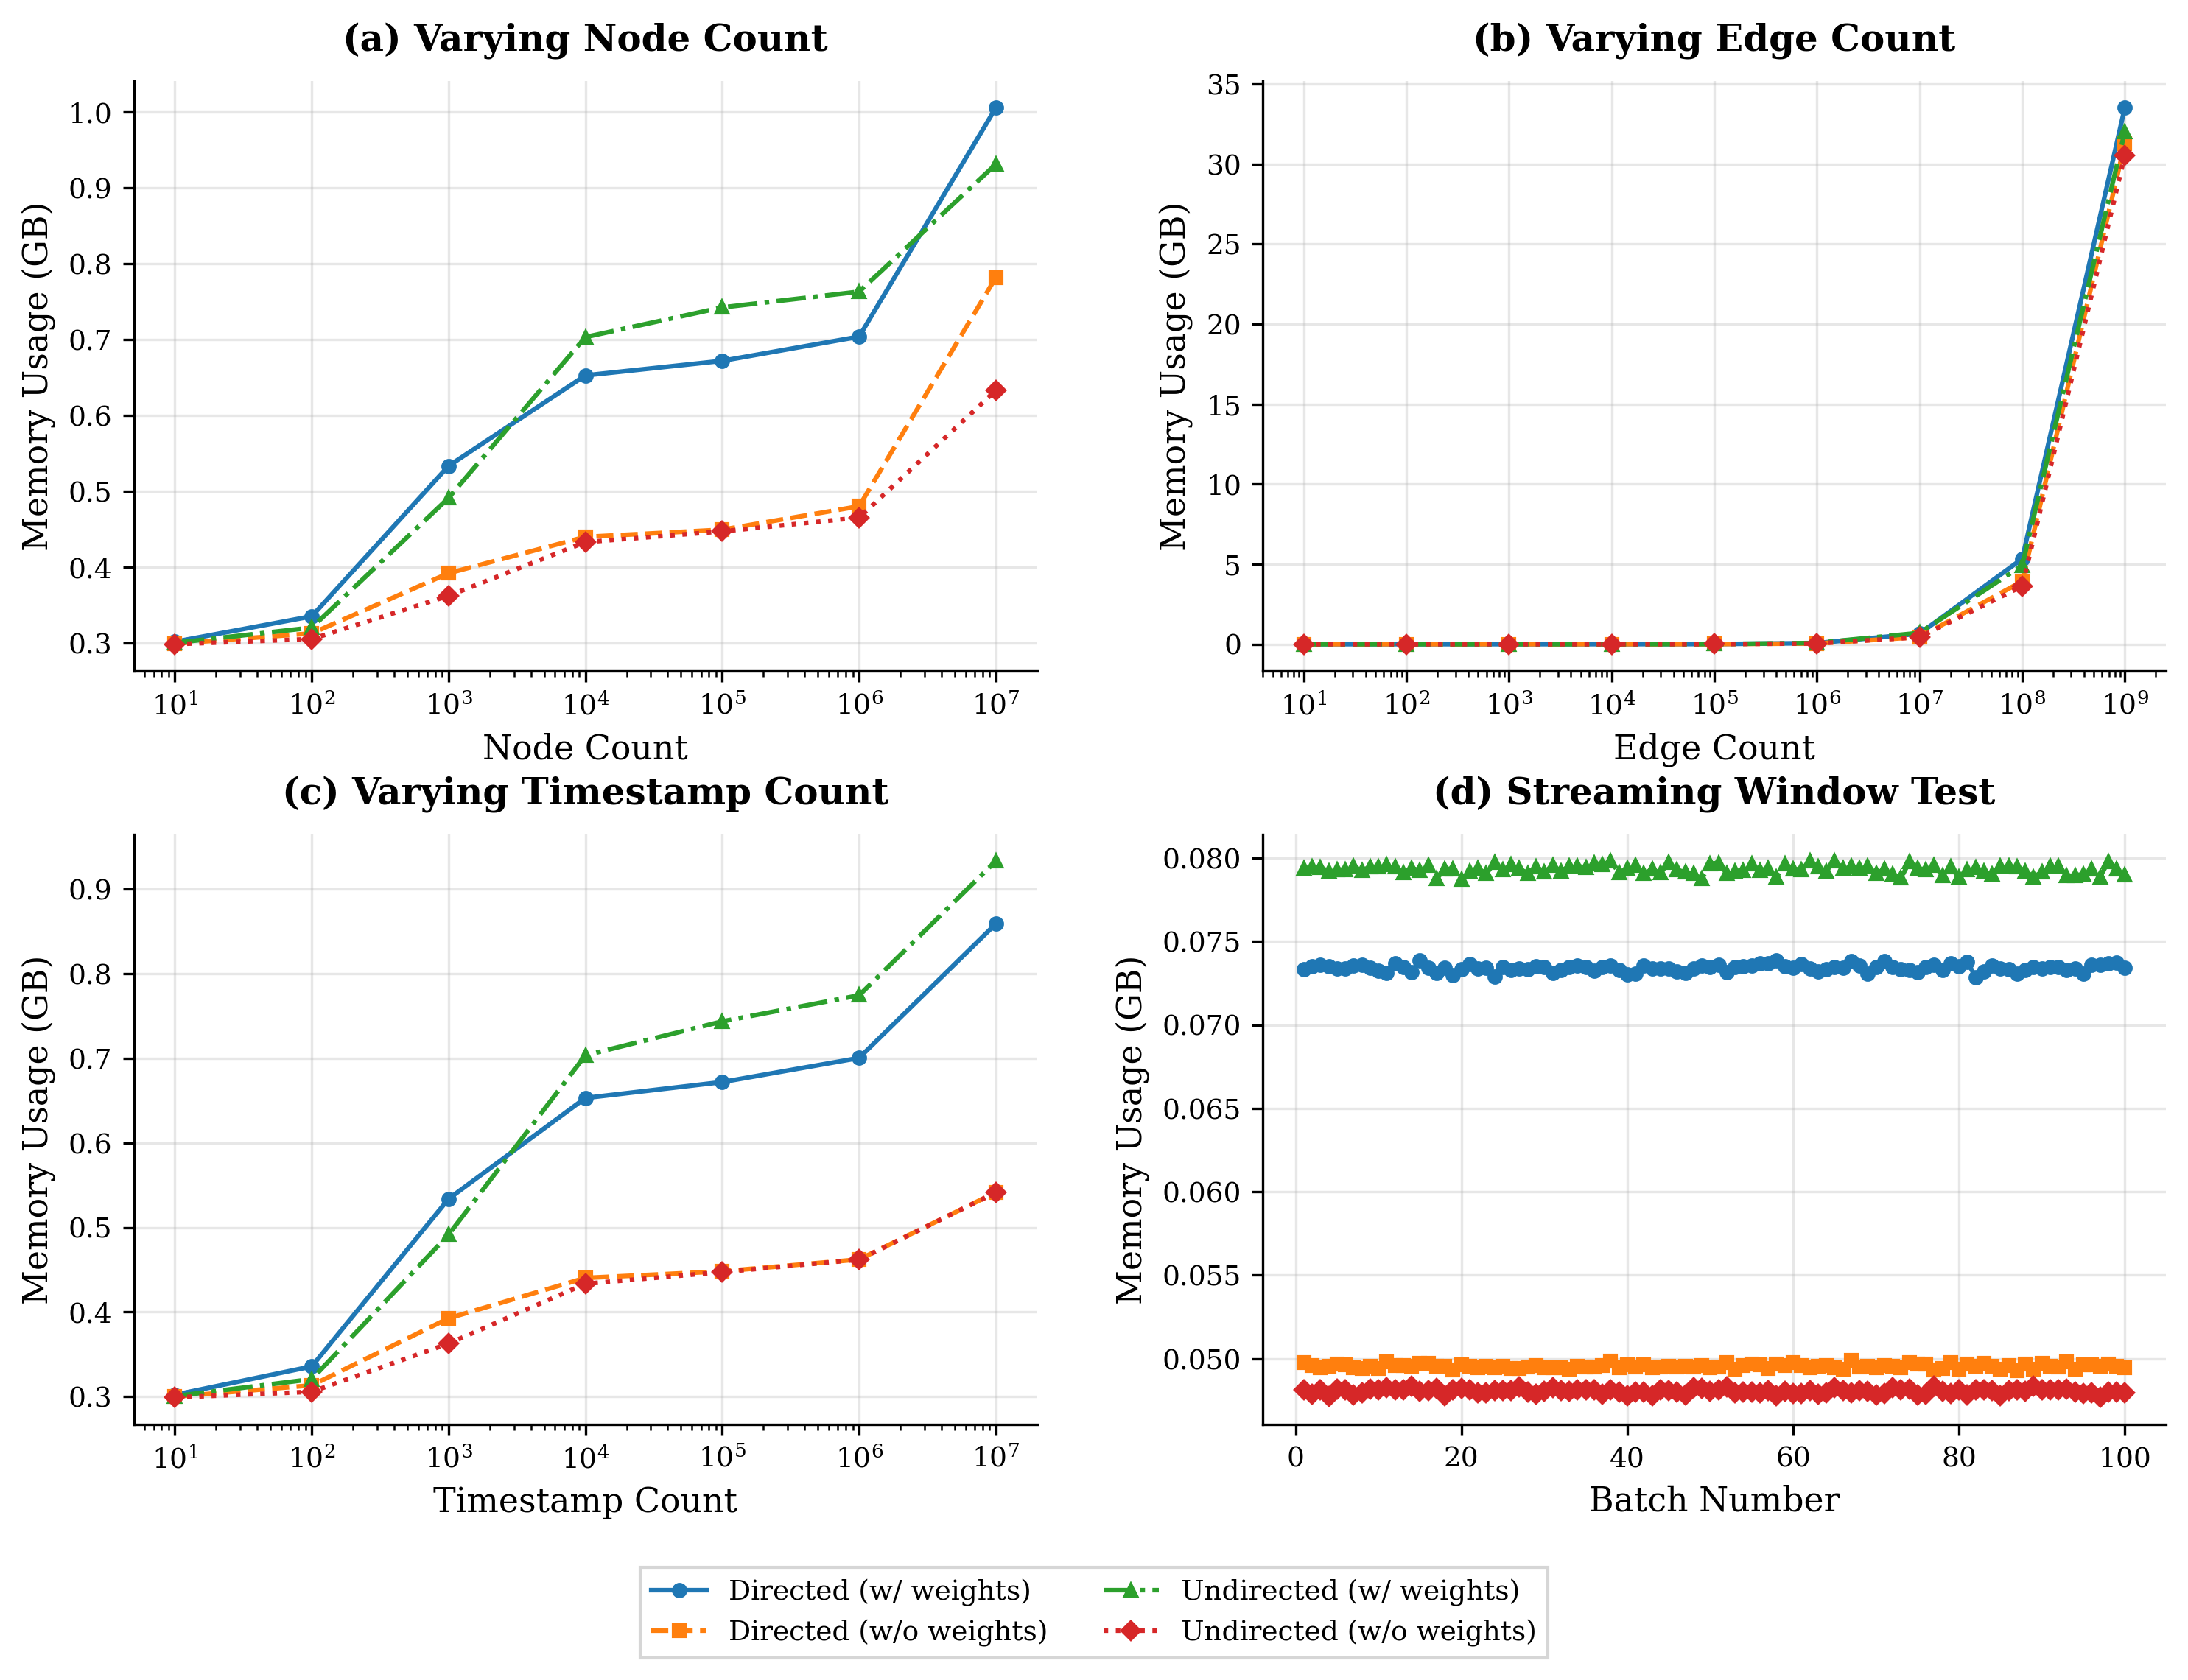

In [3]:
import pickle
import matplotlib.pyplot as plt

# Load results
with open('results/memory_benchmarking.pickle', 'rb') as f:
    results = pickle.load(f)

# Configure fonts and style for academic paper - matching other plots
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 10,
    'axes.labelsize': 11,
    'axes.titlesize': 12,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9,
    'text.usetex': False,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight'
})

# Create 2x2 subplot with academic sizing
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # Increased height for better proportion

# Professional color scheme and markers
configs = ['directed_with_weights', 'directed_without_weights',
          'undirected_with_weights', 'undirected_without_weights']
config_labels = ['Directed (w/ weights)', 'Directed (w/o weights)',
                'Undirected (w/ weights)', 'Undirected (w/o weights)']

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
markers = ['o', 's', '^', 'D']
linestyles = ['-', '--', '-.', ':']

# Plot 1: Increasing Nodes
ax = axes[0, 0]
for idx, (config, color, marker, linestyle) in enumerate(zip(configs, colors, markers, linestyles)):
    if f"increasing_nodes_{config}" in results:
        data = results[f"increasing_nodes_{config}"]
        nodes = list(data.keys())
        memory = [x / 1024 for x in data.values()]
        ax.semilogx(nodes, memory, marker=marker, color=color, linestyle=linestyle,
                   label=config_labels[idx], markersize=4, linewidth=1.5)

ax.set_title('(a) Varying Node Count', fontweight='bold', pad=10)
ax.set_xlabel('Node Count')
ax.set_ylabel('Memory Usage (GB)')
ax.grid(True, alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.ticklabel_format(style='plain', axis='y')

# Plot 2: Increasing Edges
ax = axes[0, 1]
for idx, (config, color, marker, linestyle) in enumerate(zip(configs, colors, markers, linestyles)):
    if f"increasing_edges_{config}" in results:
        data = results[f"increasing_edges_{config}"]
        edges = list(data.keys())
        memory = [x / 1024 for x in data.values()]
        ax.semilogx(edges, memory, marker=marker, color=color, linestyle=linestyle,
                   markersize=4, linewidth=1.5)

ax.set_title('(b) Varying Edge Count', fontweight='bold', pad=10)
ax.set_xlabel('Edge Count')
ax.set_ylabel('Memory Usage (GB)')
ax.grid(True, alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.ticklabel_format(style='plain', axis='y')

# Plot 3: Increasing Timestamps
ax = axes[1, 0]
for idx, (config, color, marker, linestyle) in enumerate(zip(configs, colors, markers, linestyles)):
    if f"increasing_timestamps_{config}" in results:
        data = results[f"increasing_timestamps_{config}"]
        timestamps = list(data.keys())
        memory = [x / 1024 for x in data.values()]
        ax.semilogx(timestamps, memory, marker=marker, color=color, linestyle=linestyle,
                   markersize=4, linewidth=1.5)

ax.set_title('(c) Varying Timestamp Count', fontweight='bold', pad=10)
ax.set_xlabel('Timestamp Count')
ax.set_ylabel('Memory Usage (GB)')
ax.grid(True, alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.ticklabel_format(style='plain', axis='y')

# Plot 4: Streaming Window
ax = axes[1, 1]
for idx, (config, color, marker, linestyle) in enumerate(zip(configs, colors, markers, linestyles)):
    if f"streaming_window_{config}" in results:
        data = results[f"streaming_window_{config}"]
        batches = range(1, len(data) + 1)
        memory_gb = [x / 1024 for x in data]
        ax.plot(batches, memory_gb, marker=marker, color=color, linestyle=linestyle,
               markersize=4, linewidth=1.5)

ax.set_title('(d) Streaming Window Test', fontweight='bold', pad=10)
ax.set_xlabel('Batch Number')
ax.set_ylabel('Memory Usage (GB)')
ax.grid(True, alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.ticklabel_format(style='plain', axis='y')

# Add a single legend at the bottom for all subplots
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels,
          loc='lower center',
          bbox_to_anchor=(0.5, -0.02),  # Adjusted to -0.02 for better spacing
          ncol=2,  # Two columns to save space
          frameon=True,
          fancybox=False,
          fontsize=9)

# Adjust layout with space for bottom legend - matching other plots
plt.tight_layout()
plt.subplots_adjust(wspace=0.25, top=0.88, bottom=0.12)  # Adjusted to 0.12 for proper spacing

# Save as high-quality formats
plt.savefig('figures/memory_benchmarking.pdf', format='pdf', bbox_inches='tight')
plt.savefig('figures/memory_benchmarking.png', format='png', bbox_inches='tight')
plt.show()

In [5]:
import numpy as np


def human_format(x, pos):
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'.rstrip('0').rstrip('.')
    elif x >= 1_000:
        return f'{x/1_000:.0f}K'
    else:
        return str(int(x))

# Formatter function to map days → total_edges (in billions)
def billions_formatter(x, pos):
    e = np.interp(x, step_labels_days, total_edges)
    return f"{e / 1_000_000_000:.2f}B"

def compute_mean_std(data):
    data = np.array(data)
    return data.mean(axis=1), data.std(axis=1)

In [6]:
import pickle

results_dir = 'results/'

# Load the benchmark results
def load_results():
    cpu_results = {
        "edges": pickle.load(open(f"{results_dir}/result_edges_CPU.pkl", "rb")),
        "walks": pickle.load(open(f"{results_dir}/result_walks_CPU.pkl", "rb")),
        "max_walk_lens": pickle.load(open(f"{results_dir}/result_max_walk_lens_CPU.pkl", "rb")),
        "incremental": pickle.load(open(f"{results_dir}/result_incremental_sliding_CPU.pkl", "rb"))
    }

    gpu_results = {
        "edges": pickle.load(open(f"{results_dir}/result_edges_GPU.pkl", "rb")),
        "walks": pickle.load(open(f"{results_dir}/result_walks_GPU.pkl", "rb")),
        "max_walk_lens": pickle.load(open(f"{results_dir}/result_max_walk_lens_GPU.pkl", "rb")),
        "incremental": pickle.load(open(f"{results_dir}/result_incremental_sliding_GPU.pkl", "rb"))
    }

    raphtory_results = {
        "edges": pickle.load(open(f"{results_dir}/result_edges_raphtory.pkl", "rb")),
        "incremental": pickle.load(open(f"{results_dir}/result_incremental_raphtory.pkl", "rb"))
    }

    return cpu_results, gpu_results, raphtory_results

# Define edge and walk counts from the benchmark
edge_counts = [
    10_000, 50_000, 100_000, 500_000, 1_000_000, 2_000_000,
    5_000_000, 10_000_000, 20_000_000, 30_000_000, 40_000_000,
    50_000_000, 60_000_000
]

walk_counts = [
    10_000, 50_000, 100_000, 200_000, 500_000,
    1_000_000, 2_000_000, 5_000_000, 10_000_000
]

walk_lengths = list(range(10, 310, 10))

# Load results
cpu_results, gpu_results, raphtory_results = load_results()

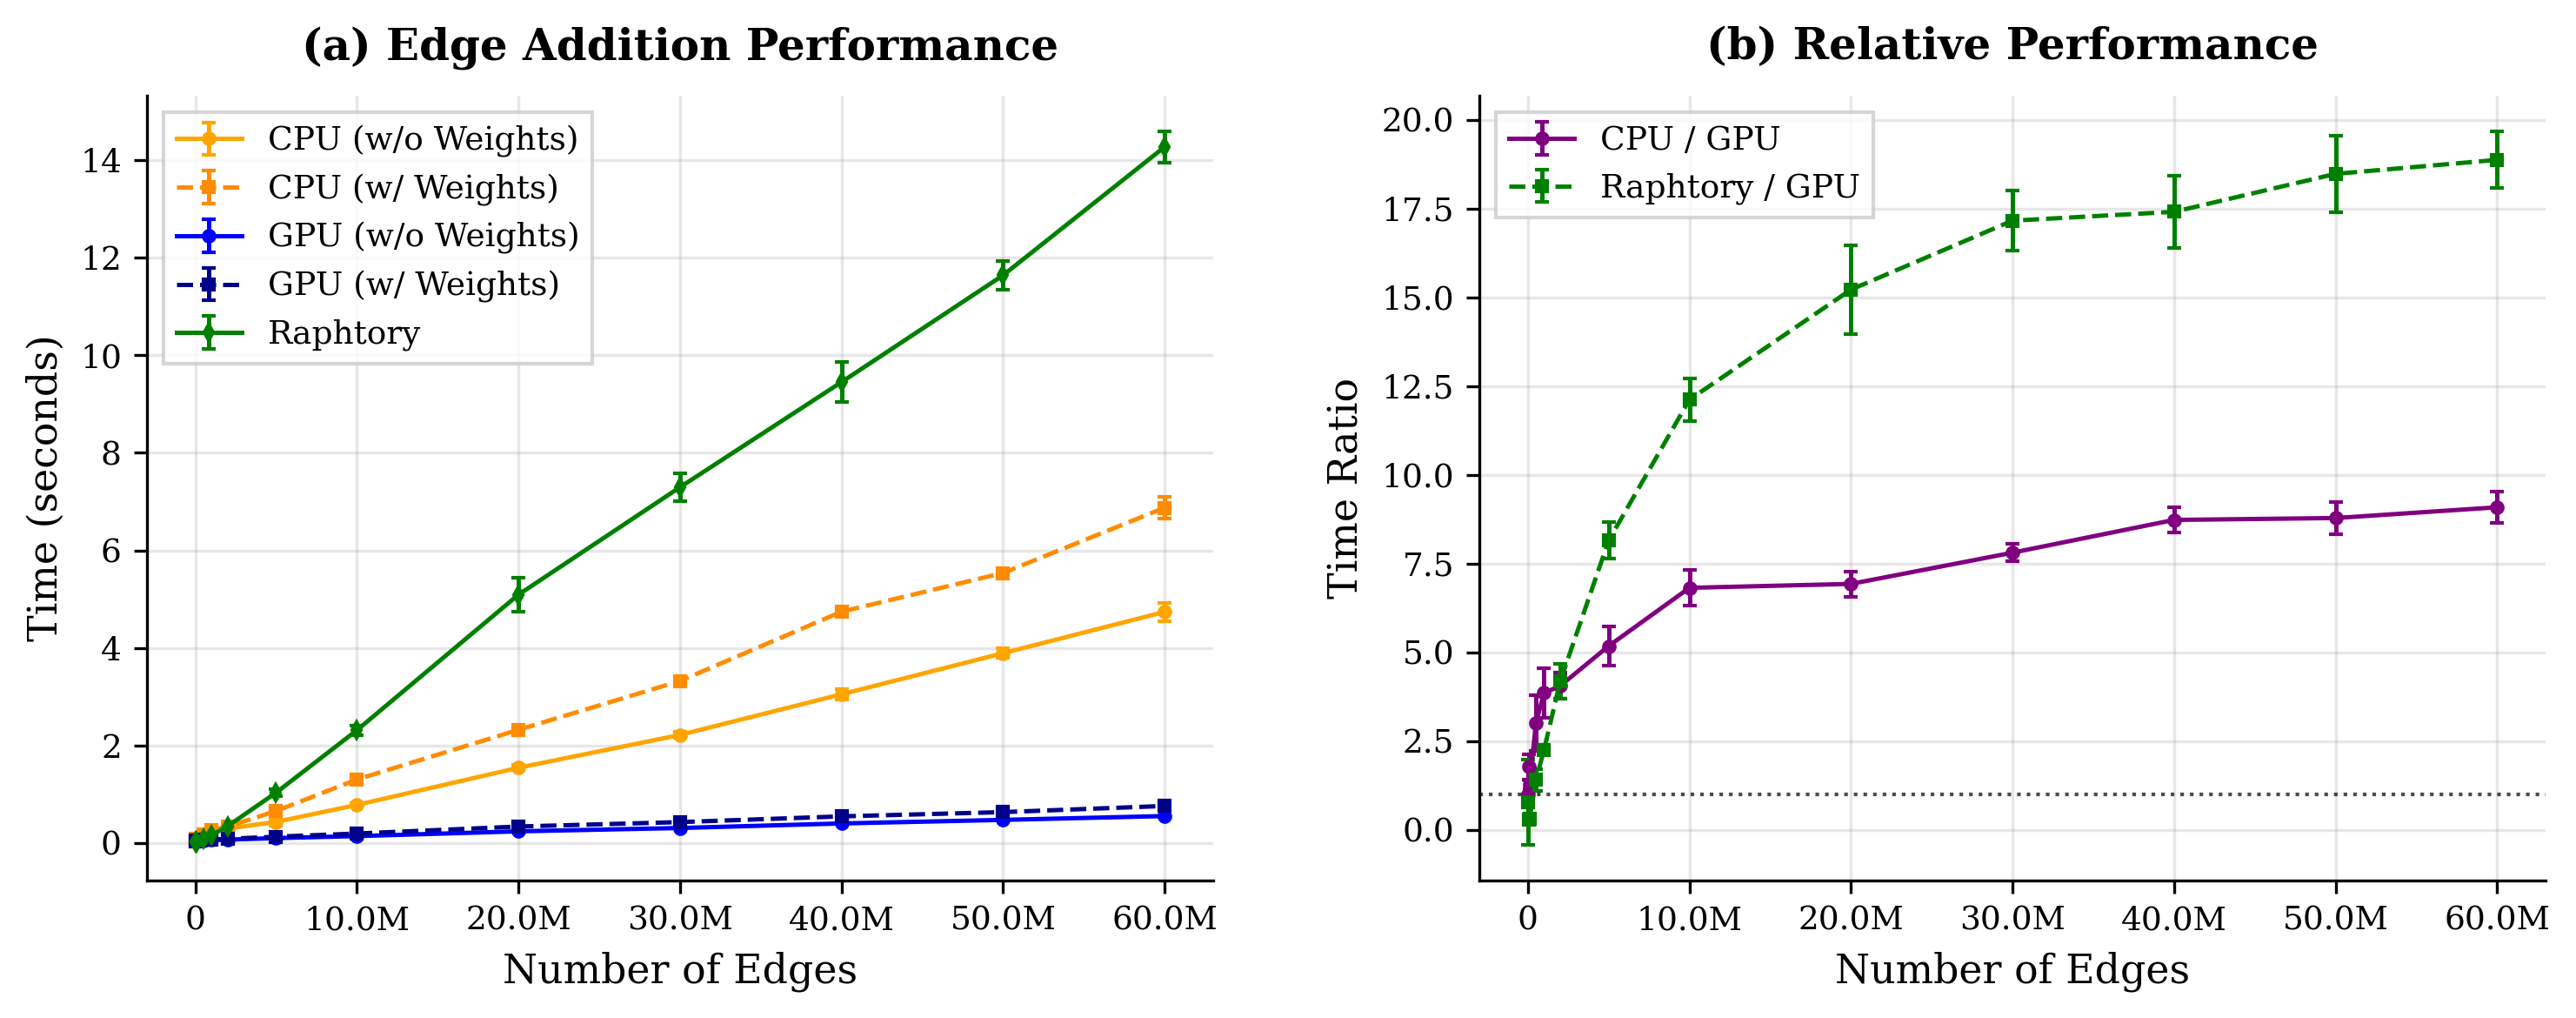

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker

# Configure fonts and style for academic paper
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 10,
    'axes.labelsize': 11,
    'axes.titlesize': 12,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9,
    'text.usetex': False,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight'
})

# Academic color scheme - matching original plots
colors = {
    'cpu_no_weights': 'orange',       # Orange
    'cpu_weights': 'darkorange',      # Dark orange
    'gpu_no_weights': 'blue',         # Blue
    'gpu_weights': 'darkblue',        # Dark blue
    'raphtory': 'green',              # Green
    'ratio_cpu_gpu': 'purple',        # Purple
    'ratio_raphtory_gpu': 'green'     # Green
}

# Compute means and standard deviations
cpu_mean_wo, cpu_std_wo = compute_mean_std(cpu_results["edges"]["edge_addition_time_without_weights"])
cpu_mean_w, cpu_std_w = compute_mean_std(cpu_results["edges"]["edge_addition_time_with_weights"])
gpu_mean_wo, gpu_std_wo = compute_mean_std(gpu_results["edges"]["edge_addition_time_without_weights"])
gpu_mean_w, gpu_std_w = compute_mean_std(gpu_results["edges"]["edge_addition_time_with_weights"])
raphtory_mean, raphtory_std = compute_mean_std(raphtory_results["edges"])

# Compute ratios and propagated error bars
ratios_cpu_gpu = cpu_mean_w / gpu_mean_w
ratios_cpu_gpu_std = ratios_cpu_gpu * np.sqrt((cpu_std_w / cpu_mean_w) ** 2 + (gpu_std_w / gpu_mean_w) ** 2)

ratios_raphtory_gpu = raphtory_mean / gpu_mean_w
ratios_raphtory_gpu_std = ratios_raphtory_gpu * np.sqrt((raphtory_std / raphtory_mean) ** 2 + (gpu_std_w / gpu_mean_w) ** 2)

# Create 1x2 subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# --- Left plot: Absolute Performance ---
ax1.errorbar(edge_counts, cpu_mean_wo, yerr=cpu_std_wo,
             fmt='o-', color=colors['cpu_no_weights'], label="CPU (w/o Weights)",
             markersize=3, linewidth=1.2, capsize=2)

ax1.errorbar(edge_counts, cpu_mean_w, yerr=cpu_std_w,
             fmt='s--', color=colors['cpu_weights'], label="CPU (w/ Weights)",
             markersize=3, linewidth=1.2, capsize=2)

ax1.errorbar(edge_counts, gpu_mean_wo, yerr=gpu_std_wo,
             fmt='o-', color=colors['gpu_no_weights'], label="GPU (w/o Weights)",
             markersize=3, linewidth=1.2, capsize=2)

ax1.errorbar(edge_counts, gpu_mean_w, yerr=gpu_std_w,
             fmt='s--', color=colors['gpu_weights'], label="GPU (w/ Weights)",
             markersize=3, linewidth=1.2, capsize=2)

ax1.errorbar(edge_counts, raphtory_mean, yerr=raphtory_std,
             fmt='d-', color=colors['raphtory'], label="Raphtory",
             markersize=3, linewidth=1.2, capsize=2)

ax1.xaxis.set_major_formatter(ticker.FuncFormatter(human_format))
ax1.set_xlabel("Number of Edges")
ax1.set_ylabel("Time (seconds)")
ax1.set_title("(a) Edge Addition Performance", fontweight='bold', pad=10)
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper left', frameon=True, fancybox=False, fontsize=9)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# --- Right plot: Performance Ratios ---
ax2.errorbar(edge_counts, ratios_cpu_gpu, yerr=ratios_cpu_gpu_std,
             fmt='o-', color=colors['ratio_cpu_gpu'], label='CPU / GPU',
             markersize=3, linewidth=1.2, capsize=2)

ax2.errorbar(edge_counts, ratios_raphtory_gpu, yerr=ratios_raphtory_gpu_std,
             fmt='s--', color=colors['ratio_raphtory_gpu'], label='Raphtory / GPU',
             markersize=3, linewidth=1.2, capsize=2)

# Add horizontal line at y=1 for reference
ax2.axhline(y=1, color='black', linestyle=':', alpha=0.7, linewidth=1)

ax2.xaxis.set_major_formatter(ticker.FuncFormatter(human_format))
ax2.set_xlabel("Number of Edges")
ax2.set_ylabel("Time Ratio")
ax2.set_title("(b) Relative Performance", fontweight='bold', pad=10)
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper left', frameon=True, fancybox=False, fontsize=9)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(wspace=0.25)

# Save with high quality
plt.savefig("figures/edge_addition_combined_performance.pdf", format='pdf', bbox_inches='tight')
plt.savefig("figures/edge_addition_combined_performance.png", format='png', bbox_inches='tight')
plt.show()

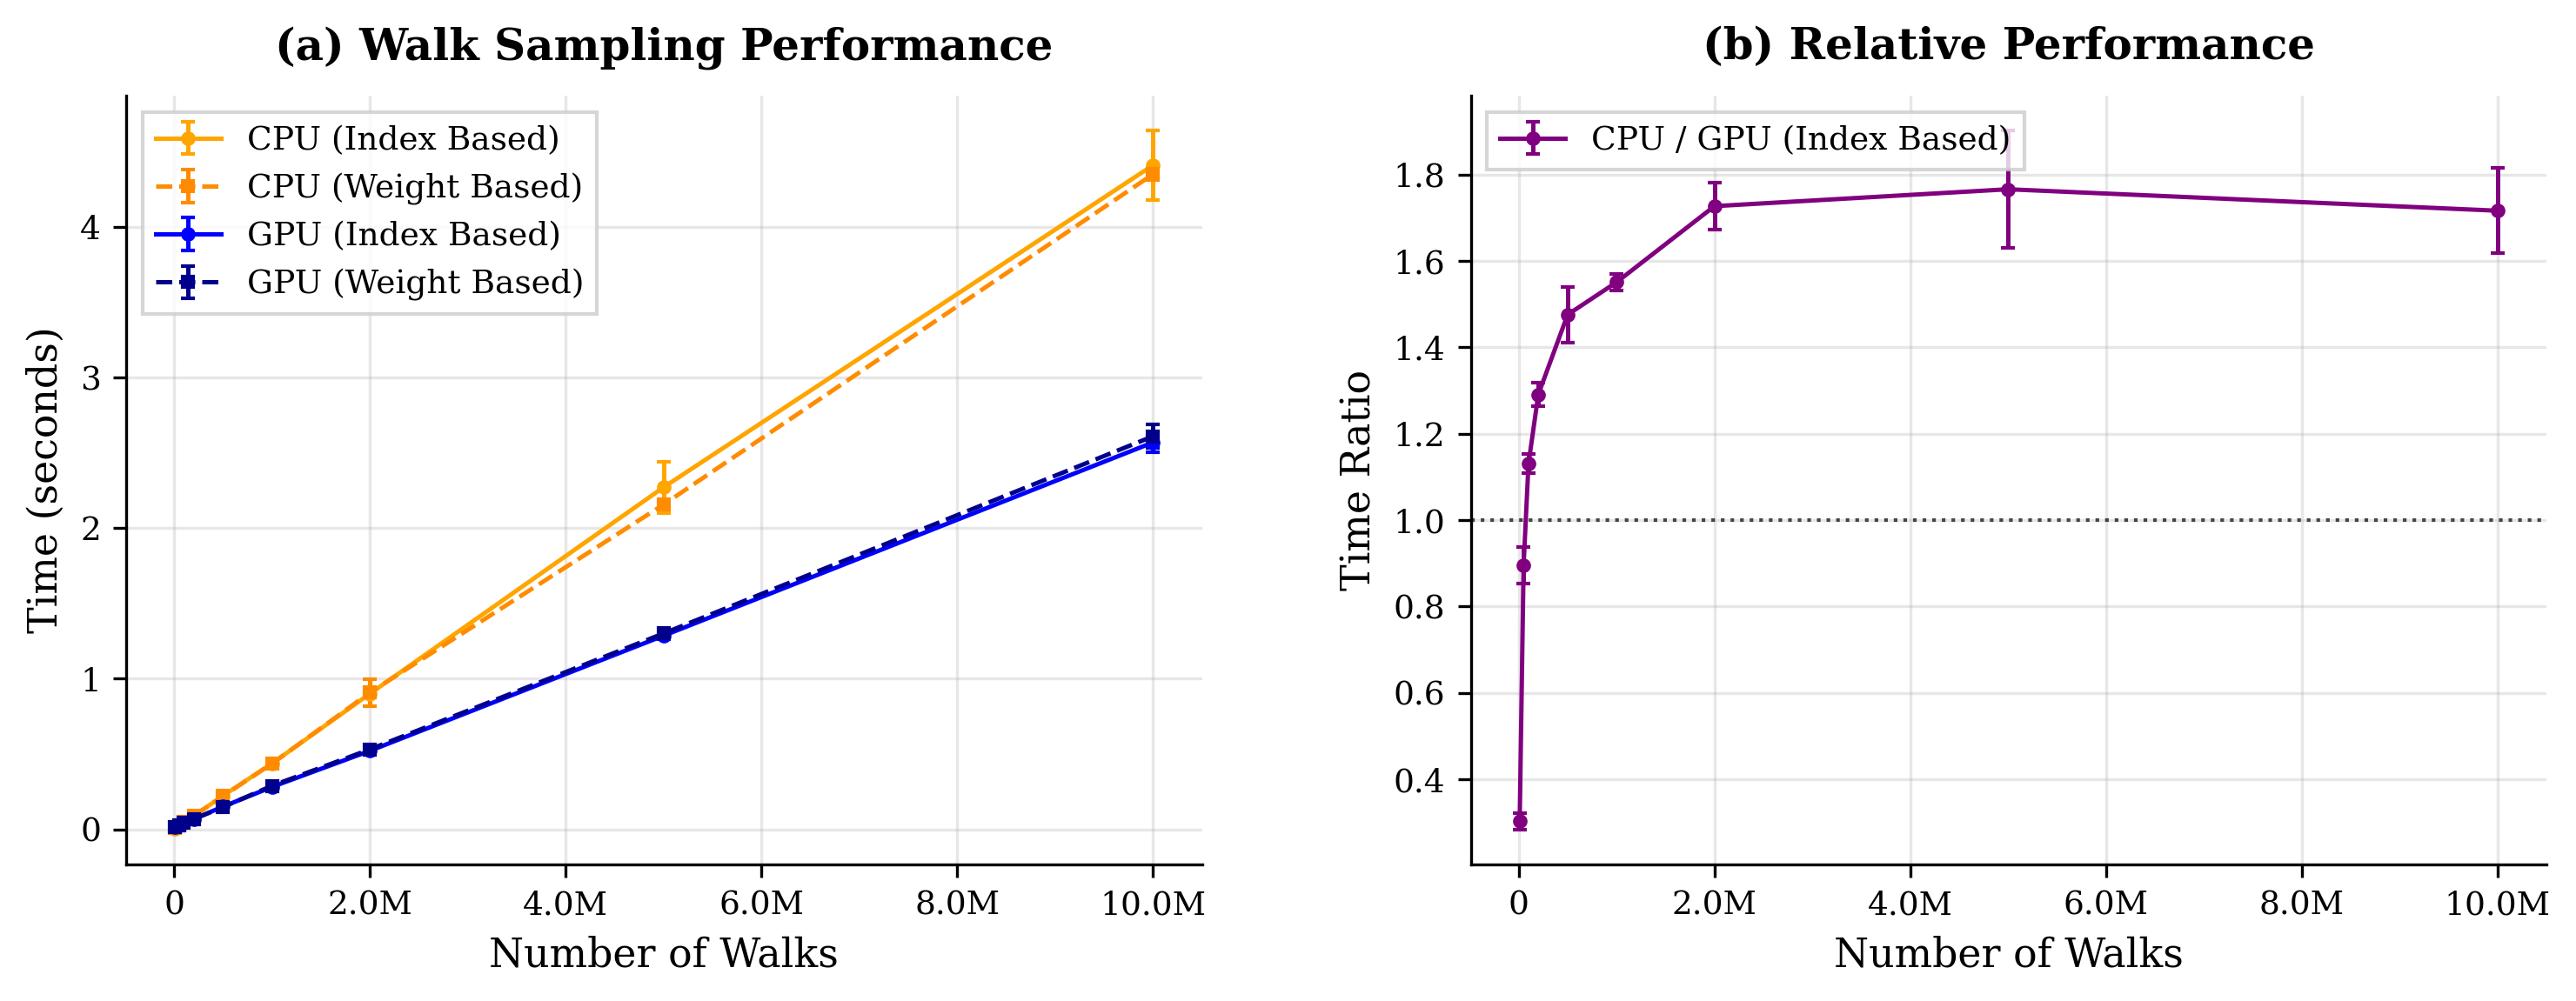

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker

# Configure fonts and style for academic paper
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 10,
    'axes.labelsize': 11,
    'axes.titlesize': 12,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9,
    'text.usetex': False,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight'
})

# Academic color scheme - matching your original colors
colors = {
    'cpu_index': 'orange',
    'cpu_weight': 'darkorange',
    'gpu_index': 'blue',
    'gpu_weight': 'darkblue',
    'ratio': 'purple'
}

# Compute mean and std for all series
cpu_mean_index, cpu_std_index = compute_mean_std(cpu_results["walks"]["walk_sampling_time_index_based"])
cpu_mean_weight, cpu_std_weight = compute_mean_std(cpu_results["walks"]["walk_sampling_time_weight_based"])
gpu_mean_index, gpu_std_index = compute_mean_std(gpu_results["walks"]["walk_sampling_time_index_based"])
gpu_mean_weight, gpu_std_weight = compute_mean_std(gpu_results["walks"]["walk_sampling_time_weight_based"])

# Compute ratio and error propagation (using index-based for comparison)
ratios = cpu_mean_index / gpu_mean_index
ratios_std = ratios * np.sqrt((cpu_std_index / cpu_mean_index) ** 2 + (gpu_std_index / gpu_mean_index) ** 2)

# Create 1x2 subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# --- Left plot: Absolute Performance ---
ax1.errorbar(walk_counts, cpu_mean_index, yerr=cpu_std_index,
             fmt='o-', color=colors['cpu_index'], label="CPU (Index Based)",
             markersize=3, linewidth=1.2, capsize=2)

ax1.errorbar(walk_counts, cpu_mean_weight, yerr=cpu_std_weight,
             fmt='s--', color=colors['cpu_weight'], label="CPU (Weight Based)",
             markersize=3, linewidth=1.2, capsize=2)

ax1.errorbar(walk_counts, gpu_mean_index, yerr=gpu_std_index,
             fmt='o-', color=colors['gpu_index'], label="GPU (Index Based)",
             markersize=3, linewidth=1.2, capsize=2)

ax1.errorbar(walk_counts, gpu_mean_weight, yerr=gpu_std_weight,
             fmt='s--', color=colors['gpu_weight'], label="GPU (Weight Based)",
             markersize=3, linewidth=1.2, capsize=2)

ax1.xaxis.set_major_formatter(ticker.FuncFormatter(human_format))
ax1.set_xlabel("Number of Walks")
ax1.set_ylabel("Time (seconds)")
ax1.set_title("(a) Walk Sampling Performance", fontweight='bold', pad=10)
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper left', frameon=True, fancybox=False, fontsize=9)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# --- Right plot: Performance Ratios ---
ax2.errorbar(walk_counts, ratios, yerr=ratios_std,
             fmt='o-', color=colors['ratio'], label='CPU / GPU (Index Based)',
             markersize=3, linewidth=1.2, capsize=2)

# Add horizontal line at y=1 for reference
ax2.axhline(y=1, color='black', linestyle=':', alpha=0.7, linewidth=1)

ax2.xaxis.set_major_formatter(ticker.FuncFormatter(human_format))
ax2.set_xlabel("Number of Walks")
ax2.set_ylabel("Time Ratio")
ax2.set_title("(b) Relative Performance", fontweight='bold', pad=10)
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper left', frameon=True, fancybox=False, fontsize=9)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(wspace=0.25, top=0.88)  # Add space for suptitle

# Save with high quality
plt.savefig("figures/walk_sampling_combined_performance.pdf", format='pdf', bbox_inches='tight')
plt.savefig("figures/walk_sampling_combined_performance.png", format='png', bbox_inches='tight')
plt.show()

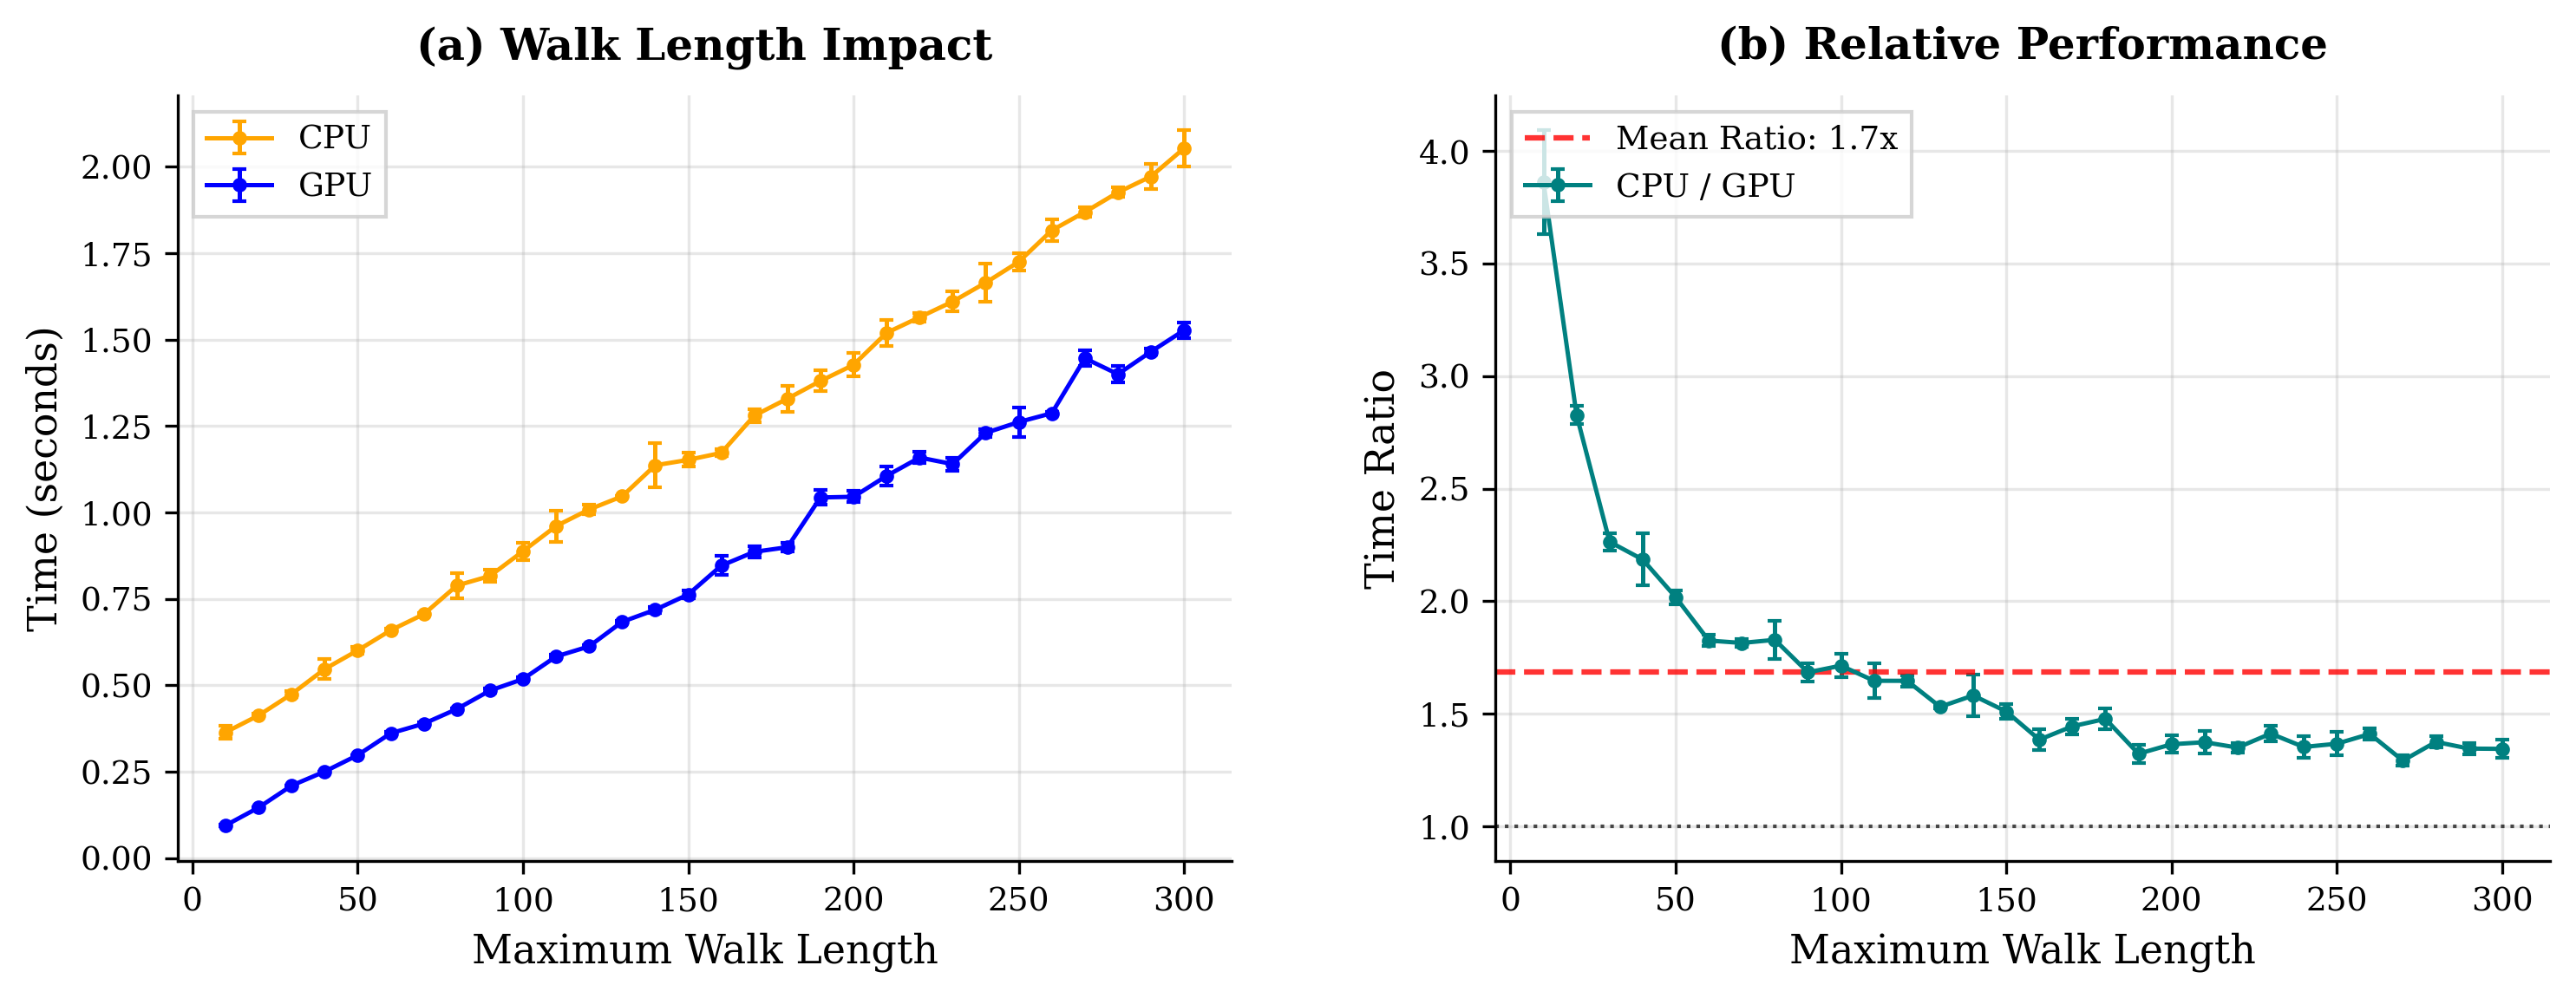

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Configure fonts and style for academic paper
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 10,
    'axes.labelsize': 11,
    'axes.titlesize': 12,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9,
    'text.usetex': False,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight'
})

# Academic color scheme - matching your original colors
colors = {
    'cpu': 'orange',
    'gpu': 'blue',
    'ratio': 'teal'
}

# Compute mean and std for each walk length
cpu_mean, cpu_std = compute_mean_std(cpu_results["max_walk_lens"]["walk_sampling_time"])
gpu_mean, gpu_std = compute_mean_std(gpu_results["max_walk_lens"]["walk_sampling_time"])

# Compute ratios and propagated error
ratios = cpu_mean / gpu_mean
ratios_std = ratios * np.sqrt((cpu_std / cpu_mean) ** 2 + (gpu_std / gpu_mean) ** 2)

# Create 1x2 subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# --- Left plot: Absolute Performance ---
ax1.errorbar(walk_lengths, cpu_mean, yerr=cpu_std,
             fmt='o-', color=colors['cpu'], label="CPU",
             markersize=3, linewidth=1.2, capsize=2)

ax1.errorbar(walk_lengths, gpu_mean, yerr=gpu_std,
             fmt='o-', color=colors['gpu'], label="GPU",
             markersize=3, linewidth=1.2, capsize=2)

ax1.set_xlabel("Maximum Walk Length")
ax1.set_ylabel("Time (seconds)")
ax1.set_title("(a) Walk Length Impact", fontweight='bold', pad=10)
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper left', frameon=True, fancybox=False, fontsize=9)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# --- Right plot: Performance Ratios ---
ax2.errorbar(walk_lengths, ratios, yerr=ratios_std,
             fmt='o-', color=colors['ratio'], label='CPU / GPU',
             markersize=3, linewidth=1.2, capsize=2)

# Add horizontal lines for reference
ax2.axhline(y=1, color='black', linestyle=':', alpha=0.7, linewidth=1)

# Add mean ratio line
mean_ratio = np.mean(ratios)
ax2.axhline(y=mean_ratio, color='red', linestyle='--', alpha=0.8, linewidth=1.5,
            label=f'Mean Ratio: {mean_ratio:.1f}x')

ax2.set_xlabel("Maximum Walk Length")
ax2.set_ylabel("Time Ratio")
ax2.set_title("(b) Relative Performance", fontweight='bold', pad=10)
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper left', frameon=True, fancybox=False, fontsize=9)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(wspace=0.25, top=0.88)  # Add space for suptitle

# Save with high quality
plt.savefig("figures/walk_length_combined_performance.pdf", format='pdf', bbox_inches='tight')
plt.savefig("figures/walk_length_combined_performance.png", format='png', bbox_inches='tight')
plt.show()